### Métricas de Avaliação de Precisão (Acurácia)
Nesta aula veremos como avaliar a precisão de uma previsão utilizando as seguintes métricas: 
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

A seguir, utilizaremos o dataset "Eletric Production" para gerar um modelo de previsão com base no método Holt-Winters.

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from matplotlib import dates
%matplotlib inline

df = pd.read_csv('Electric_Production.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Vamos plotar a série temporal.

<Axes: xlabel='DATE'>

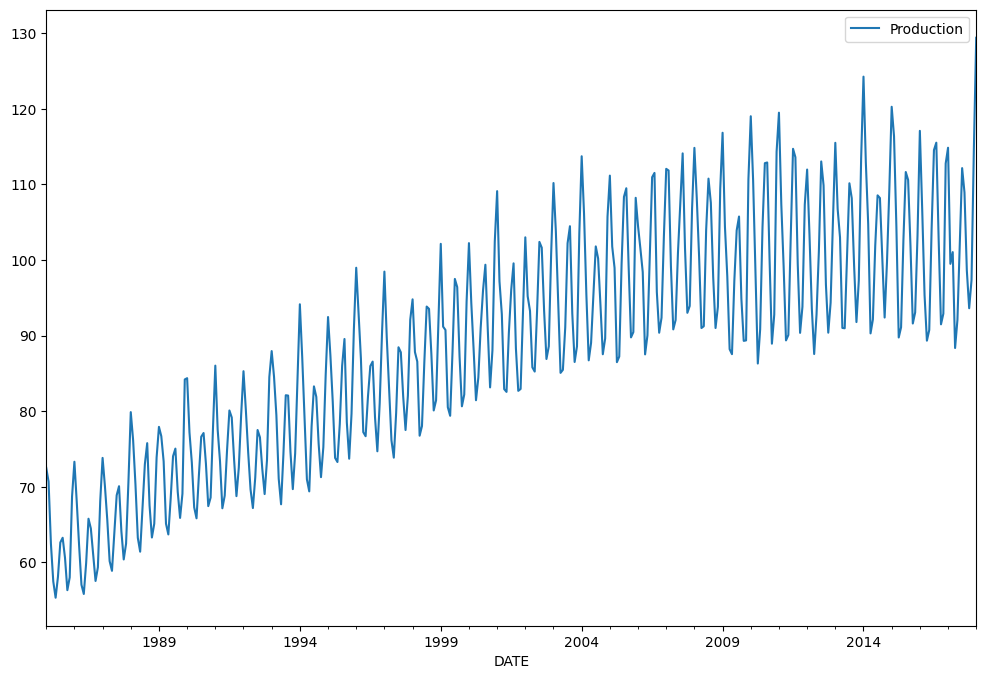

In [21]:
df.plot(figsize=(12,8))

vamos agora plotar os últimos 24 meses.

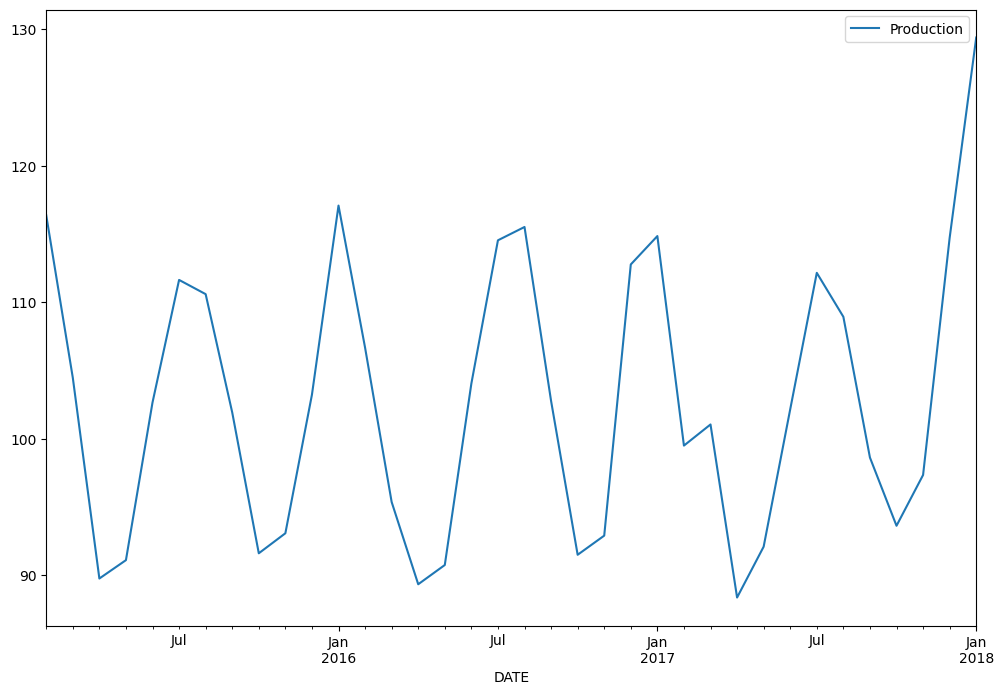

In [22]:
df.tail(36).plot(figsize=(12,8)).autoscale(axis='x' , tight=True)

Vamos agora dividir o dataset em treino e teste.

In [23]:
trainingData = df.iloc[:round(3*(len(df)/4))]
testingData= df.iloc[round(3*(len(df)/4)):]

len(testingData)


99

Podemos agora ajustar nosso modelo Holt-Winters.

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_ajustado = ExponentialSmoothing(trainingData['Production'], trend="mul" , seasonal='mul' , seasonal_periods=12).fit()

/home/aluno/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Agora vamos comparar os dados de previsão com os dados de teste plotando um gráfico.

<Axes: xlabel='DATE'>

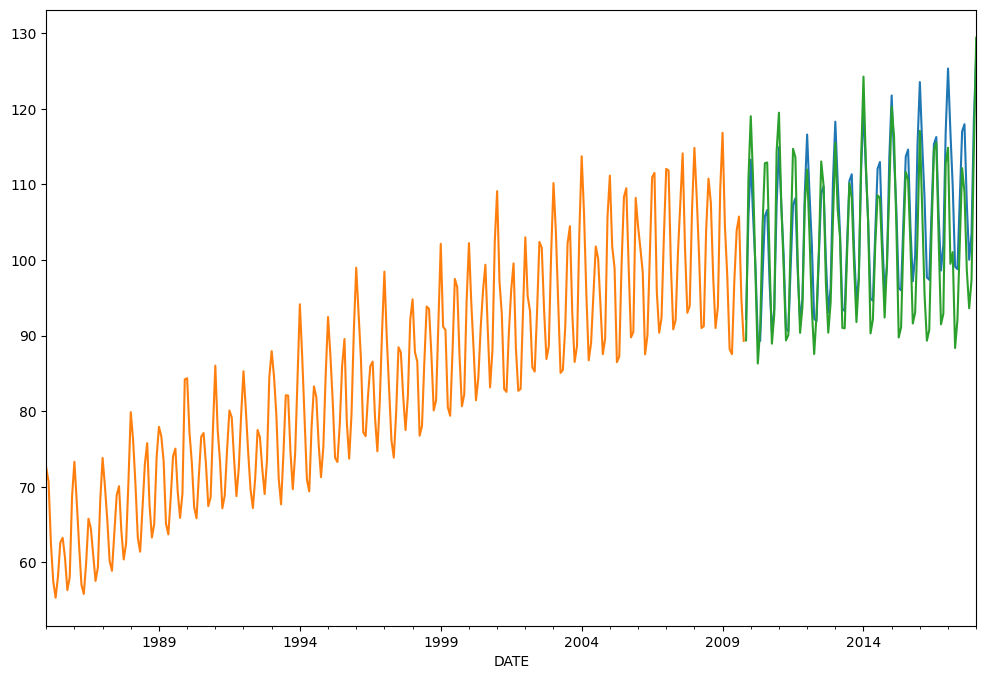

In [25]:
previsao = modelo_ajustado.forecast(99)
previsao.plot(figsize=(12,8))
trainingData["Production"].plot()
testingData["Production"].plot()

Para uma melhor observação, vamos plotar apenas os dados de teste e as respectivas previsões.

Apesar de observarmos um acerto na sazonalidade, vemos que os picos e os vales são bem diferentes entre os dados de teste e de previsão. Para entender se isso compromete a nossa previsão, utilizaremos métricas de avaliação de precisão.

### MAE - Mean Absolute Error
O Erro Médio Absoluto (MAE) é uma métrica comumente usada para medir a precisão de previsões. Ele quantifica a diferença média absoluta entre os valores previstos e os valores reais. A fórmula para calcular o MAE é a seguinte:

MAE = (1 / n) * Σ |teste - previsão| \
onde: \
MAE é o Erro Médio Absoluto \
n é o número de data points (amostras) \
Σ |teste — previsão| representa o somatório do módulo da diferença entre o valor real e o valor previsto para cada data point


Vamos calcular o MAE para o nosso exemplo.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(testingData , previsao)

4.137591899210191

Interpretação do resultado: \
O valor de 4.13 indica que, na média, nossa previsão está 4.13 unidades dos valores reais. Valores baixos de MAE indicam maior precisão, enquanto valores altos indicam que a previsão está ruim. 

Vantagens:
- Fácil de entender;
- O valor de erro é apresentado na mesma unidade que os dados originais, facilitando sua interpretação;
- Lida bem com outliers, uma vez que trabalha com valores absolutos de diferenças.

Desvantagens:
- Não penaliza com mais rigor erros grandes, o que pode ser uma limitação quando a ocorrência de erros grandes são críticos;
- Trata superestimativas e subestimativas da mesma forma, o que não permite saber se as previsões estão superestimadas ou subestimadas.


### RMSE - Root Mean Squared Error
A Raiz do Erro Quadrático Médio (RMSE) é outra métrica amplamente utilizada para medir a precisão de previsões. O RMSE quantifica a magnitude média dos erros entre os valores previstos e os valores reais, dando mais peso aos erros maiores. É uma métrica importante, especialmente quando erros maiores são motivo de maior preocupação. A fórmula matemática para calcular o RMSE é a seguinte:

RMSE = √((1 / n) * Σ(teste — previsao)²) \
onde: \
RMSE é a raiz do erro quadrático médio \
n é o número de data points (amostras) \
Σ(teste — previsao)² representa o somatório do quadrado da diferença entre o valor real e o valor previsto para cada data point

Vamos calcular o RMSE para o nosso exemplo.

In [27]:
#mean_squared_error,mean_absolute_error, mean_absolute_percentage_error


Interpretação do resultado: \
RMSE quantifica a magnitude média dos erros. Assim, o valor 5.21 sugere que, na média, as previsões estão 5.21 unidades distantes dos valores reais.

Vantagens: 
- Provê uma métrica que dá maior peso a erros grandes;
- Penaliza erros grandes mais severamente que a MAE;
- Valores de erro são mostrados na mesma unidade dos dados originais.

Desvantagem:
- Supervaloriza os outliers, uma vez que as diferenças são elevadas ao quadrado.


### MAPE - Mean Absolute Percentage Error
O Erro Percentual Absoluto Médio (MAPE) é uma métrica usada para medir a precisão de previsões ou prognósticos como uma porcentagem dos valores reais. Ele quantifica a diferença percentual média entre os valores previstos e os valores reais. A expressão matemática para calcular o MAPE é a seguinte:

MAPE = (1 / n) * Σ(|(actual — forecast) / actual|) * 100%
onde: \
n é o número de data points (amostras) \
Σ |teste — previsão| representa o somatório do módulo da diferença entre o valor real e o valor previsto para cada data point
o resultado é multiplicado por 100% para expressar o erro como uma porcentagem.

Vamos calcular o MAPE para o nosso exemplo:

Interpretação: \
Um MAPE de 0.4 indica que, em média, os erros de previsão estão 0,4% distantes dos dados reais, o que é considerado bom.

Vantagens:
- Expressa o erro como uma porcentagem, o que pode ser útil para entender a magnitude relativa do erro.
- Ideal para comparar previsões que utilizam diferentes datasets ou diferentes variáveis.

Desvantagens:
- Problemático quendo os valores reais são muito próximos de zero, pois pode resultar em divisão por zero ou valore percentuais extremamente altos.
- Não é simétrico; não considera a direção dos erros (superestimação vs subestimação).

### Exercício
Utilizando o dataset "venda_champagne", ajuste um modelo de previsão Holt-Winters que utilize 75% dos dados para treino e 25% dos dados para teste. Plote os dados de treino, teste e a previsão obtida. Em seguida, calcule o MAE, o RMSE e o MAPE para a previsão gerada e discuta os resultados.


In [28]:
df2 = pd.read_csv('venda_champagne.csv',index_col='Month',parse_dates=True)
df2.index.freq = 'MS'
df2.head()

,Sales(milion)
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<Axes: xlabel='Month'>

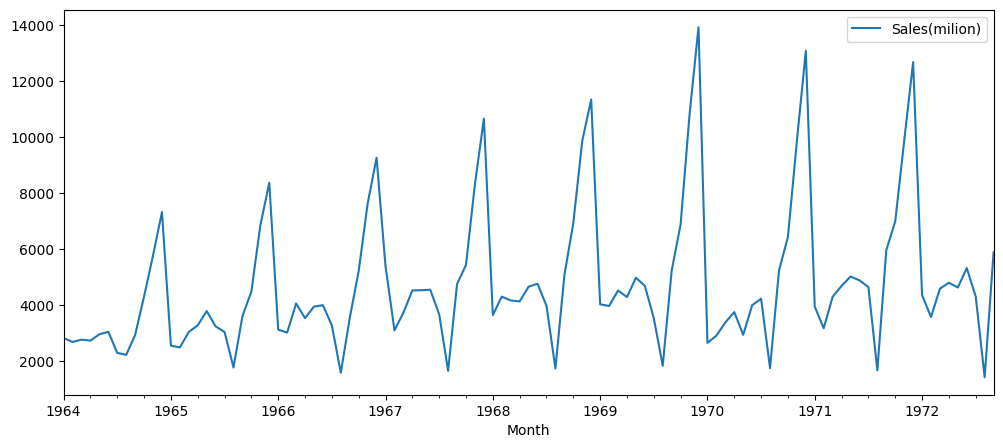

In [30]:
df2.plot(figsize=(12,5))

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sales(milion)  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [35]:
dados_treino = df2.iloc[:79]
dados_test = df2.iloc[79:]


In [38]:
modelo_ajustado = ExponentialSmoothing(dados_treino['Sales(milion)'], trend="mul" , seasonal='mul' , seasonal_periods=12).fit()
previsao = modelo_ajustado.forecast(26).rename("Previsão HW")

/home/aluno/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/home/aluno/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Month'>

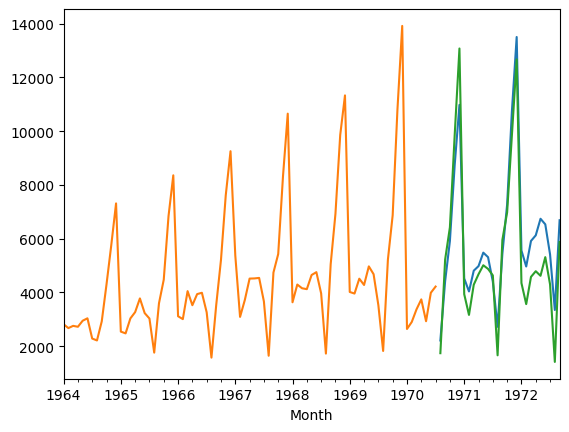

In [41]:
previsao.plot()
dados_treino['Sales(milion)'].plot()
dados_test['Sales(milion)'].plot()

In [42]:
mean_absolute_error(dados_test, previsao)

942.0250175396716

In [43]:
np.sqrt(mean_squared_error(dados_test, previsao))

1079.285193120172

In [44]:
mean_absolute_percentage_error(dados_test, previsao)

0.24015756458430568